In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [2]:
#If you dont have the latest keras version, dont run this

os.environ["KERAS_BACKEND"] = "tensorflow"

In [3]:
path = './data/'
sequences1 = list()
max_row = 300  # Change this to the desired maximum row number

for i in range(1, 101):
    file_path = path + str(i) + '.csv'
    print(file_path)
    
    # Read only up to the specified maximum row
    df = pd.read_csv(file_path, header=0, nrows=max_row, usecols=[0,1,2,4,5, 15, 18, 82, 84])
    
    values = df.values
    print(f"Shape of values read from {file_path}: {values.shape}")
    print(f"Data types in {file_path}: {values.dtype}")  
    sequences1.append(values)
    



./data/1.csv
Shape of values read from ./data/1.csv: (300, 9)
Data types in ./data/1.csv: float64
./data/2.csv
Shape of values read from ./data/2.csv: (300, 9)
Data types in ./data/2.csv: float64
./data/3.csv
Shape of values read from ./data/3.csv: (300, 9)
Data types in ./data/3.csv: float64
./data/4.csv
Shape of values read from ./data/4.csv: (300, 9)
Data types in ./data/4.csv: float64
./data/5.csv
Shape of values read from ./data/5.csv: (300, 9)
Data types in ./data/5.csv: float64
./data/6.csv
Shape of values read from ./data/6.csv: (300, 9)
Data types in ./data/6.csv: float64
./data/7.csv
Shape of values read from ./data/7.csv: (300, 9)
Data types in ./data/7.csv: float64
./data/8.csv
Shape of values read from ./data/8.csv: (300, 9)
Data types in ./data/8.csv: float64
./data/9.csv
Shape of values read from ./data/9.csv: (300, 9)
Data types in ./data/9.csv: float64
./data/10.csv
Shape of values read from ./data/10.csv: (300, 9)
Data types in ./data/10.csv: float64
./data/11.csv
Sha

Shape of values read from ./data/98.csv: (300, 9)
Data types in ./data/98.csv: float64
./data/99.csv
Shape of values read from ./data/99.csv: (300, 9)
Data types in ./data/99.csv: float64
./data/100.csv
Shape of values read from ./data/100.csv: (300, 9)
Data types in ./data/100.csv: float64


In [4]:
df

,hmi_RCSCT5_VALUE,hmi_RRCTP10_VALUE,hmi_MRSPT514_VALUE,hmi_RCSLT501_VALUE,hmi_RCSFT414_VALUE,hmi_RCSPT405_VALUE,hmi_RCSTT413B_VALUE,hmi_RCSTT453A_VALUE,hmi_RCSTT1734_VALUE,time
0,851.011,2028.140,73.0291,78.3666,119.66200,129.64600,292.750,344.684,3.83989,1
1,850.694,1648.080,73.9474,78.8971,119.66200,115.64700,293.592,343.896,-2.07706,2
2,850.649,1066.800,76.9191,77.9526,119.66200,107.36800,294.863,341.531,-5.29151,3
3,850.726,344.117,78.4529,75.2810,119.66200,100.86000,296.192,336.751,-7.27488,4
4,851.080,325.851,78.8195,72.8887,119.66200,95.27010,297.619,329.334,-8.68442,5
...,...,...,...,...,...,...,...,...,...,...
295,2332.120,154.239,16.1544,58.4229,3.24824,3.10920,148.606,156.871,-24.91170,296
296,2330.850,154.143,16.1241,58.2311,3.23941,3.09280,148.407,156.855,-24.88710,297
297,2329.550,154.046,16.0891,56.9236,3.23428,3.07657,148.204,156.839,-24.86290,298
298,2328.170,153.950,16.0334,56.5890,3.22947,3.06181,148.014,156.824,-24.82070,299


In [4]:
y_data = []

for i in range(1,101,1):
    y_data.append(i)


y_data
print(y_data)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [5]:
print (len (y_data), len(sequences1))

100 100


In [6]:
sequences1= np.array(sequences1)
y_data = np.array(y_data)

num_samples = len(sequences1)
indices = np.arange(num_samples)
np.random.shuffle(indices)

shuffled_data = sequences1[indices]
shuffled_targets = y_data[indices]
shuffled_data, shuffled_targets

(array([[[0.00000000e+00, 1.55500015e+02, 3.10000000e+02, ...,
          0.00000000e+00, 0.00000000e+00, 1.60000000e+03],
         [1.00000000e+01, 1.55468201e+02, 3.09980103e+02, ...,
          0.00000000e+00, 0.00000000e+00, 1.60000000e+03],
         [2.00000000e+01, 1.55467422e+02, 3.09977661e+02, ...,
          0.00000000e+00, 0.00000000e+00, 1.60000000e+03],
         ...,
         [2.97000000e+03, 2.26390972e+01, 2.18716675e+02, ...,
          8.88747101e+01, 1.65110156e+05, 1.99985489e+02],
         [2.98000000e+03, 2.25945568e+01, 2.18602951e+02, ...,
          8.86997528e+01, 1.65356781e+05, 1.99985489e+02],
         [2.99000000e+03, 2.25507336e+01, 2.18491043e+02, ...,
          8.85275955e+01, 1.65602922e+05, 1.99985489e+02]],
 
        [[0.00000000e+00, 1.55500015e+02, 3.10000000e+02, ...,
          0.00000000e+00, 0.00000000e+00, 1.60000000e+03],
         [1.00000000e+01, 1.55468201e+02, 3.09980103e+02, ...,
          0.00000000e+00, 0.00000000e+00, 1.60000000e+03],
       

In [7]:
# Determine the sizes of each set
train_size = int(0.7 * num_samples)
val_size = int(0.2 * num_samples)
test_size = num_samples - train_size - val_size

# Split the shuffled data and targets
X_train, y_train = shuffled_data[:train_size], shuffled_targets[:train_size]
X_val, y_val = shuffled_data[train_size:train_size + val_size], shuffled_targets[train_size:train_size + val_size]
X_test, y_test = shuffled_data[train_size + val_size:], shuffled_targets[train_size + val_size:]

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape


((70, 300, 9), (10, 300, 9), (70,), (10,), (20, 300, 9), (20,))

In [9]:
# Calculate mean and standard deviation
means = np.mean(X_train, axis=(0, 1))  # Calculate mean across samples and time steps
stds = np.std(X_train, axis=(0, 1))    # Calculate std across samples and time steps
mean_y_train = np.mean(y_train)
std_y_train = np.std(y_train)

In [10]:
def preprocess(X, means, stds):
    for i in range(X.shape[2]):  # Loop over each feature
        X[:, :, i] = (X[:, :, i] - means[i]) / stds[i]
    return X

def preprocess_output3(y, mean, std):
  y = (y- mean)/std
  return y

In [11]:
# Preprocess all datasets using the same normalization parameters
X_train = preprocess(X_train, means, stds)
X_val = preprocess(X_val, means, stds)
X_test = preprocess(X_test, means, stds)


y_train = preprocess_output3(y_train, mean_y_train, std_y_train)
y_val = preprocess_output3(y_val, mean_y_train, std_y_train)
y_test = preprocess_output3(y_test, mean_y_train, std_y_train)

In [12]:
#This is only because y-data are read as lists within list when they're not
def classes(arr):
    normalized_data = [[x] for x in arr]
    return normalized_data

y_train = np.array(classes(y_train))
y_val = np.array(classes(y_val))
y_test = np.array(classes(y_test))

In [17]:
#If you dont have the latest keras version, its going to be from tf.keras.models import Sequential

from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.losses import MeanAbsoluteError, MeanSquaredLogarithmicError, MeanSquaredError
from keras.metrics import RootMeanSquaredError, MeanSquaredLogarithmicError
from keras.optimizers import Adam
from keras.losses import Huber
from keras.regularizers import *

# Define the regularization strength
l1_reg_strength = 0.013
l2_reg_strength = 0.013

# Create the model
model = Sequential()
model.add(LSTM(units=18, return_sequences=False, input_shape=(300, 9),
               kernel_regularizer=l1_l2(l1=l1_reg_strength, l2=l2_reg_strength)))

model.add(Dense(8, activation='linear'))

model.add(Dense(units=1, activation='linear', 
                kernel_regularizer=l1_l2(l1=l1_reg_strength, l2=l2_reg_strength)))


# Display model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 18)                  │           2,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,177 (8.50 KB)

 Trainable params: 2,177 (8.50 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
cp5 = ModelCheckpoint('model/best_model.keras', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [19]:
history = model.fit(X_train, y_train, batch_size = 32, validation_data=(X_val, y_val), epochs=2000, callbacks=[cp5]) 


Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - loss: 2.0558 - root_mean_squared_error: 0.7149 - val_loss: 1.8001 - val_root_mean_squared_error: 0.6411
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1.7709 - root_mean_squared_error: 0.6523 - val_loss: 1.6685 - val_root_mean_squared_error: 0.5406
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1.7229 - root_mean_squared_error: 0.5972 - val_loss: 1.5801 - val_root_mean_squared_error: 0.4674
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 1.6023 - root_mean_squared_error: 0.5165 - val_loss: 1.5177 - val_root_mean_squared_error: 0.4136
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1.5903 - root_mean_squared_error: 0.5119 - val_loss: 1.4683 - val_root_mean_squared_error: 0.3697
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1.5727 - root_mean_squared_error: 0.3968 - val_loss: 1.4301 - val_root_mean_squared_error: 0.3370
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss

Epoch 44/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.7717 - root_mean_squared_error: 0.1390 - val_loss: 0.7429 - val_root_mean_squared_error: 0.0610
Epoch 45/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.7536 - root_mean_squared_error: 0.1293 - val_loss: 0.7320 - val_root_mean_squared_error: 0.0733
Epoch 46/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.7420 - root_mean_squared_error: 0.1400 - val_loss: 0.7182 - val_root_mean_squared_error: 0.0621
Epoch 47/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.7290 - root_mean_squared_error: 0.1309 - val_loss: 0.7050 - val_root_mean_squared_error: 0.0536
Epoch 48/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.7193 - root_mean_squared_error: 0.1272 - val_loss: 0.6926 - val_root_mean_squared_error: 0.0508
Epoch 49/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.7043 - root_mean_squared_error: 0.1331 - val_loss: 0.6811 - val_root_mean_squared_error: 0.0559
Epoch 50/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3643 - root_mean_squared_error: 0.1147 - val_loss: 0.3477 - val_root_mean_squared_error: 0.0404
Epoch 87/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3525 - root_mean_squared_error: 0.0858 - val_loss: 0.3432 - val_root_mean_squared_error: 0.0566
Epoch 88/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3473 - root_mean_squared_error: 0.0935 - val_loss: 0.3374 - val_root_mean_squared_error: 0.0582
Epoch 89/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3417 - root_mean_squared_error: 0.0984 - val_loss: 0.3304 - val_root_mean_squared_error: 0.0469
Epoch 90/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3346 - root_mean_squared_error: 0.0900 - val_loss: 0.3258 - val_root_mean_squared_error: 0.0542
Epoch 91/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3290 - root_mean_squared_error: 0.0848 - val_loss: 0.3200 - val_root_mean_squared_error: 0.0509
Epoch 92/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3243

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.2022 - root_mean_squared_error: 0.0873 - val_loss: 0.1954 - val_root_mean_squared_error: 0.0470
Epoch 129/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1987 - root_mean_squared_error: 0.0766 - val_loss: 0.1934 - val_root_mean_squared_error: 0.0470
Epoch 130/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1961 - root_mean_squared_error: 0.0739 - val_loss: 0.1915 - val_root_mean_squared_error: 0.0483
Epoch 131/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1938 - root_mean_squared_error: 0.0730 - val_loss: 0.1911 - val_root_mean_squared_error: 0.0612
Epoch 132/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1938 - root_mean_squared_error: 0.0874 - val_loss: 0.1898 - val_root_mean_squared_error: 0.0627
Epoch 133/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1942 - root_mean_squared_error: 0.0909 - val_loss: 0.1858 - val_root_mean_squared_error: 0.0461
Epoch 134/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1443 - root_mean_squared_error: 0.0836 - val_loss: 0.1390 - val_root_mean_squared_error: 0.0469
Epoch 171/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1424 - root_mean_squared_error: 0.0762 - val_loss: 0.1386 - val_root_mean_squared_error: 0.0535
Epoch 172/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1416 - root_mean_squared_error: 0.0769 - val_loss: 0.1370 - val_root_mean_squared_error: 0.0486
Epoch 173/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1406 - root_mean_squared_error: 0.0703 - val_loss: 0.1362 - val_root_mean_squared_error: 0.0515
Epoch 174/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1384 - root_mean_squared_error: 0.0729 - val_loss: 0.1357 - val_root_mean_squared_error: 0.0528
Epoch 175/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1384 - root_mean_squared_error: 0.0777 - val_loss: 0.1344 - val_root_mean_squared_error: 0.0501
Epoch 176/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1139 - root_mean_squared_error: 0.1029 - val_loss: 0.1076 - val_root_mean_squared_error: 0.0658
Epoch 213/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1103 - root_mean_squared_error: 0.0833 - val_loss: 0.1095 - val_root_mean_squared_error: 0.0803
Epoch 214/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1136 - root_mean_squared_error: 0.1079 - val_loss: 0.1067 - val_root_mean_squared_error: 0.0697
Epoch 215/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1121 - root_mean_squared_error: 0.1054 - val_loss: 0.1033 - val_root_mean_squared_error: 0.0474
Epoch 216/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1089 - root_mean_squared_error: 0.0829 - val_loss: 0.1035 - val_root_mean_squared_error: 0.0529
Epoch 217/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1059 - root_mean_squared_error: 0.0757 - val_loss: 0.1035 - val_root_mean_squared_error: 0.0611
Epoch 218/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0875 - root_mean_squared_error: 0.0832 - val_loss: 0.0851 - val_root_mean_squared_error: 0.0675
Epoch 255/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0885 - root_mean_squared_error: 0.0875 - val_loss: 0.0847 - val_root_mean_squared_error: 0.0667
Epoch 256/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0906 - root_mean_squared_error: 0.0951 - val_loss: 0.0862 - val_root_mean_squared_error: 0.0795
Epoch 257/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0965 - root_mean_squared_error: 0.1286 - val_loss: 0.0820 - val_root_mean_squared_error: 0.0506
Epoch 258/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0887 - root_mean_squared_error: 0.0953 - val_loss: 0.0842 - val_root_mean_squared_error: 0.0718
Epoch 259/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0879 - root_mean_squared_error: 0.0933 - val_loss: 0.0830 - val_root_mean_squared_error: 0.0682
Epoch 260/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0691 - root_mean_squared_error: 0.0663 - val_loss: 0.0666 - val_root_mean_squared_error: 0.0447
Epoch 297/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0694 - root_mean_squared_error: 0.0663 - val_loss: 0.0659 - val_root_mean_squared_error: 0.0422
Epoch 298/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0674 - root_mean_squared_error: 0.0588 - val_loss: 0.0677 - val_root_mean_squared_error: 0.0616
Epoch 299/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0685 - root_mean_squared_error: 0.0698 - val_loss: 0.0674 - val_root_mean_squared_error: 0.0604
Epoch 300/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0698 - root_mean_squared_error: 0.0827 - val_loss: 0.0667 - val_root_mean_squared_error: 0.0571
Epoch 301/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0705 - root_mean_squared_error: 0.0806 - val_loss: 0.0650 - val_root_mean_squared_error: 0.0445
Epoch 302/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0612 - root_mean_squared_error: 0.0787 - val_loss: 0.0601 - val_root_mean_squared_error: 0.0697
Epoch 339/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0634 - root_mean_squared_error: 0.0825 - val_loss: 0.0557 - val_root_mean_squared_error: 0.0364
Epoch 340/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0590 - root_mean_squared_error: 0.0702 - val_loss: 0.0628 - val_root_mean_squared_error: 0.0909
Epoch 341/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0631 - root_mean_squared_error: 0.0989 - val_loss: 0.0582 - val_root_mean_squared_error: 0.0650
Epoch 342/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0588 - root_mean_squared_error: 0.0699 - val_loss: 0.0588 - val_root_mean_squared_error: 0.0690
Epoch 343/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0604 - root_mean_squared_error: 0.0821 - val_loss: 0.0568 - val_root_mean_squared_error: 0.0586
Epoch 344/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0502 - root_mean_squared_error: 0.0574 - val_loss: 0.0491 - val_root_mean_squared_error: 0.0540
Epoch 381/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0501 - root_mean_squared_error: 0.0615 - val_loss: 0.0515 - val_root_mean_squared_error: 0.0741
Epoch 382/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0510 - root_mean_squared_error: 0.0730 - val_loss: 0.0491 - val_root_mean_squared_error: 0.0553
Epoch 383/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0502 - root_mean_squared_error: 0.0662 - val_loss: 0.0496 - val_root_mean_squared_error: 0.0591
Epoch 384/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0513 - root_mean_squared_error: 0.0708 - val_loss: 0.0503 - val_root_mean_squared_error: 0.0661
Epoch 385/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0524 - root_mean_squared_error: 0.0833 - val_loss: 0.0496 - val_root_mean_squared_error: 0.0631
Epoch 386/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0430 - root_mean_squared_error: 0.0575 - val_loss: 0.0433 - val_root_mean_squared_error: 0.0614
Epoch 423/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0424 - root_mean_squared_error: 0.0535 - val_loss: 0.0427 - val_root_mean_squared_error: 0.0570
Epoch 424/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0420 - root_mean_squared_error: 0.0475 - val_loss: 0.0419 - val_root_mean_squared_error: 0.0516
Epoch 425/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0424 - root_mean_squared_error: 0.0572 - val_loss: 0.0446 - val_root_mean_squared_error: 0.0723
Epoch 426/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0440 - root_mean_squared_error: 0.0731 - val_loss: 0.0430 - val_root_mean_squared_error: 0.0630
Epoch 427/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0439 - root_mean_squared_error: 0.0734 - val_loss: 0.0429 - val_root_mean_squared_error: 0.0642
Epoch 428/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0371 - root_mean_squared_error: 0.0484 - val_loss: 0.0368 - val_root_mean_squared_error: 0.0482
Epoch 465/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0372 - root_mean_squared_error: 0.0500 - val_loss: 0.0365 - val_root_mean_squared_error: 0.0462
Epoch 466/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0373 - root_mean_squared_error: 0.0511 - val_loss: 0.0361 - val_root_mean_squared_error: 0.0433
Epoch 467/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0376 - root_mean_squared_error: 0.0544 - val_loss: 0.0370 - val_root_mean_squared_error: 0.0532
Epoch 468/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0361 - root_mean_squared_error: 0.0460 - val_loss: 0.0397 - val_root_mean_squared_error: 0.0723
Epoch 469/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0418 - root_mean_squared_error: 0.0880 - val_loss: 0.0378 - val_root_mean_squared_error: 0.0590
Epoch 470/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0359 - root_mean_squared_error: 0.0748 - val_loss: 0.0335 - val_root_mean_squared_error: 0.0606
Epoch 507/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0337 - root_mean_squared_error: 0.0617 - val_loss: 0.0385 - val_root_mean_squared_error: 0.0928
Epoch 508/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0355 - root_mean_squared_error: 0.0800 - val_loss: 0.0341 - val_root_mean_squared_error: 0.0664
Epoch 509/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0328 - root_mean_squared_error: 0.0592 - val_loss: 0.0342 - val_root_mean_squared_error: 0.0674
Epoch 510/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0329 - root_mean_squared_error: 0.0576 - val_loss: 0.0327 - val_root_mean_squared_error: 0.0570
Epoch 511/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0327 - root_mean_squared_error: 0.0538 - val_loss: 0.0362 - val_root_mean_squared_error: 0.0821
Epoch 512/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0293 - root_mean_squared_error: 0.0570 - val_loss: 0.0286 - val_root_mean_squared_error: 0.0489
Epoch 549/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0280 - root_mean_squared_error: 0.0414 - val_loss: 0.0304 - val_root_mean_squared_error: 0.0652
Epoch 550/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0284 - root_mean_squared_error: 0.0516 - val_loss: 0.0282 - val_root_mean_squared_error: 0.0479
Epoch 551/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0273 - root_mean_squared_error: 0.0390 - val_loss: 0.0293 - val_root_mean_squared_error: 0.0585
Epoch 552/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0278 - root_mean_squared_error: 0.0454 - val_loss: 0.0283 - val_root_mean_squared_error: 0.0497
Epoch 553/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0279 - root_mean_squared_error: 0.0472 - val_loss: 0.0285 - val_root_mean_squared_error: 0.0527
Epoch 554/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0381 - root_mean_squared_error: 0.0992 - val_loss: 0.0373 - val_root_mean_squared_error: 0.0933
Epoch 591/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0389 - root_mean_squared_error: 0.1082 - val_loss: 0.0313 - val_root_mean_squared_error: 0.0600
Epoch 592/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0350 - root_mean_squared_error: 0.0835 - val_loss: 0.0297 - val_root_mean_squared_error: 0.0483
Epoch 593/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0327 - root_mean_squared_error: 0.0696 - val_loss: 0.0306 - val_root_mean_squared_error: 0.0593
Epoch 594/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0319 - root_mean_squared_error: 0.0710 - val_loss: 0.0329 - val_root_mean_squared_error: 0.0788
Epoch 595/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0337 - root_mean_squared_error: 0.0883 - val_loss: 0.0341 - val_root_mean_squared_error: 0.0875
Epoch 596/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0249 - root_mean_squared_error: 0.0402 - val_loss: 0.0250 - val_root_mean_squared_error: 0.0502
Epoch 633/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0243 - root_mean_squared_error: 0.0397 - val_loss: 0.0254 - val_root_mean_squared_error: 0.0541
Epoch 634/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0240 - root_mean_squared_error: 0.0396 - val_loss: 0.0254 - val_root_mean_squared_error: 0.0530
Epoch 635/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0244 - root_mean_squared_error: 0.0433 - val_loss: 0.0258 - val_root_mean_squared_error: 0.0577
Epoch 636/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0245 - root_mean_squared_error: 0.0462 - val_loss: 0.0252 - val_root_mean_squared_error: 0.0517
Epoch 637/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0245 - root_mean_squared_error: 0.0487 - val_loss: 0.0254 - val_root_mean_squared_error: 0.0552
Epoch 638/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0229 - root_mean_squared_error: 0.0411 - val_loss: 0.0236 - val_root_mean_squared_error: 0.0524
Epoch 675/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0228 - root_mean_squared_error: 0.0409 - val_loss: 0.0251 - val_root_mean_squared_error: 0.0650
Epoch 676/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0238 - root_mean_squared_error: 0.0529 - val_loss: 0.0255 - val_root_mean_squared_error: 0.0673
Epoch 677/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0245 - root_mean_squared_error: 0.0555 - val_loss: 0.0233 - val_root_mean_squared_error: 0.0495
Epoch 678/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0225 - root_mean_squared_error: 0.0407 - val_loss: 0.0230 - val_root_mean_squared_error: 0.0457
Epoch 679/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0229 - root_mean_squared_error: 0.0452 - val_loss: 0.0228 - val_root_mean_squared_error: 0.0439
Epoch 680/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0213 - root_mean_squared_error: 0.0390 - val_loss: 0.0262 - val_root_mean_squared_error: 0.0821
Epoch 717/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0265 - root_mean_squared_error: 0.0874 - val_loss: 0.0292 - val_root_mean_squared_error: 0.0976
Epoch 718/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0302 - root_mean_squared_error: 0.0999 - val_loss: 0.0266 - val_root_mean_squared_error: 0.0818
Epoch 719/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0264 - root_mean_squared_error: 0.0723 - val_loss: 0.0256 - val_root_mean_squared_error: 0.0725
Epoch 720/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0244 - root_mean_squared_error: 0.0685 - val_loss: 0.0259 - val_root_mean_squared_error: 0.0766
Epoch 721/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0263 - root_mean_squared_error: 0.0805 - val_loss: 0.0226 - val_root_mean_squared_error: 0.0512
Epoch 722/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0245 - root_mean_squared_error: 0.0793 - val_loss: 0.0233 - val_root_mean_squared_error: 0.0680
Epoch 759/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0235 - root_mean_squared_error: 0.0627 - val_loss: 0.0220 - val_root_mean_squared_error: 0.0573
Epoch 760/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0217 - root_mean_squared_error: 0.0515 - val_loss: 0.0272 - val_root_mean_squared_error: 0.0906
Epoch 761/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0221 - root_mean_squared_error: 0.0603 - val_loss: 0.0238 - val_root_mean_squared_error: 0.0719
Epoch 762/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0215 - root_mean_squared_error: 0.0549 - val_loss: 0.0265 - val_root_mean_squared_error: 0.0874
Epoch 763/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0237 - root_mean_squared_error: 0.0682 - val_loss: 0.0247 - val_root_mean_squared_error: 0.0772
Epoch 764/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0325 - root_mean_squared_error: 0.0986 - val_loss: 0.0262 - val_root_mean_squared_error: 0.0695
Epoch 801/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0273 - root_mean_squared_error: 0.0779 - val_loss: 0.0314 - val_root_mean_squared_error: 0.0991
Epoch 802/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0315 - root_mean_squared_error: 0.1030 - val_loss: 0.0248 - val_root_mean_squared_error: 0.0594
Epoch 803/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0286 - root_mean_squared_error: 0.0825 - val_loss: 0.0244 - val_root_mean_squared_error: 0.0586
Epoch 804/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0266 - root_mean_squared_error: 0.0715 - val_loss: 0.0296 - val_root_mean_squared_error: 0.0903
Epoch 805/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0296 - root_mean_squared_error: 0.0960 - val_loss: 0.0251 - val_root_mean_squared_error: 0.0654
Epoch 806/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0234 - root_mean_squared_error: 0.0722 - val_loss: 0.0225 - val_root_mean_squared_error: 0.0621
Epoch 843/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0242 - root_mean_squared_error: 0.0648 - val_loss: 0.0226 - val_root_mean_squared_error: 0.0631
Epoch 844/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0223 - root_mean_squared_error: 0.0638 - val_loss: 0.0237 - val_root_mean_squared_error: 0.0702
Epoch 845/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0241 - root_mean_squared_error: 0.0690 - val_loss: 0.0222 - val_root_mean_squared_error: 0.0593
Epoch 846/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0233 - root_mean_squared_error: 0.0702 - val_loss: 0.0236 - val_root_mean_squared_error: 0.0701
Epoch 847/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0230 - root_mean_squared_error: 0.0657 - val_loss: 0.0218 - val_root_mean_squared_error: 0.0578
Epoch 848/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0237 - root_mean_squared_error: 0.0762 - val_loss: 0.0268 - val_root_mean_squared_error: 0.0929
Epoch 885/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0296 - root_mean_squared_error: 0.1107 - val_loss: 0.0280 - val_root_mean_squared_error: 0.0983
Epoch 886/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0285 - root_mean_squared_error: 0.1042 - val_loss: 0.0226 - val_root_mean_squared_error: 0.0678
Epoch 887/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0243 - root_mean_squared_error: 0.0759 - val_loss: 0.0230 - val_root_mean_squared_error: 0.0706
Epoch 888/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0233 - root_mean_squared_error: 0.0692 - val_loss: 0.0212 - val_root_mean_squared_error: 0.0571
Epoch 889/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0216 - root_mean_squared_error: 0.0611 - val_loss: 0.0201 - val_root_mean_squared_error: 0.0486
Epoch 890/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0195 - root_mean_squared_error: 0.0585 - val_loss: 0.0208 - val_root_mean_squared_error: 0.0664
Epoch 927/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0201 - root_mean_squared_error: 0.0602 - val_loss: 0.0204 - val_root_mean_squared_error: 0.0628
Epoch 928/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0194 - root_mean_squared_error: 0.0570 - val_loss: 0.0194 - val_root_mean_squared_error: 0.0548
Epoch 929/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0197 - root_mean_squared_error: 0.0550 - val_loss: 0.0191 - val_root_mean_squared_error: 0.0527
Epoch 930/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0193 - root_mean_squared_error: 0.0549 - val_loss: 0.0198 - val_root_mean_squared_error: 0.0590
Epoch 931/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0191 - root_mean_squared_error: 0.0541 - val_loss: 0.0189 - val_root_mean_squared_error: 0.0515
Epoch 932/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0189 - root_mean_squared_error: 0.0507 - val_loss: 0.0185 - val_root_mean_squared_error: 0.0561
Epoch 969/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0187 - root_mean_squared_error: 0.0583 - val_loss: 0.0174 - val_root_mean_squared_error: 0.0435
Epoch 970/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0186 - root_mean_squared_error: 0.0581 - val_loss: 0.0175 - val_root_mean_squared_error: 0.0458
Epoch 971/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0189 - root_mean_squared_error: 0.0613 - val_loss: 0.0173 - val_root_mean_squared_error: 0.0437
Epoch 972/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0193 - root_mean_squared_error: 0.0605 - val_loss: 0.0184 - val_root_mean_squared_error: 0.0539
Epoch 973/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0194 - root_mean_squared_error: 0.0621 - val_loss: 0.0181 - val_root_mean_squared_error: 0.0519
Epoch 974/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0183 - root_mean_squared_error: 0.0580 - val_loss: 0.0215 - val_root_mean_squared_error: 0.0794
Epoch 1011/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0203 - root_mean_squared_error: 0.0731 - val_loss: 0.0201 - val_root_mean_squared_error: 0.0714
Epoch 1012/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0184 - root_mean_squared_error: 0.0598 - val_loss: 0.0190 - val_root_mean_squared_error: 0.0641
Epoch 1013/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0180 - root_mean_squared_error: 0.0569 - val_loss: 0.0215 - val_root_mean_squared_error: 0.0804
Epoch 1014/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0198 - root_mean_squared_error: 0.0665 - val_loss: 0.0181 - val_root_mean_squared_error: 0.0556
Epoch 1015/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0182 - root_mean_squared_error: 0.0570 - val_loss: 0.0188 - val_root_mean_squared_error: 0.0629
Epoch 1016/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0190 - root_mean_squared_error: 0.0624 - val_loss: 0.0192 - val_root_mean_squared_error: 0.0618
Epoch 1053/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0213 - root_mean_squared_error: 0.0798 - val_loss: 0.0183 - val_root_mean_squared_error: 0.0580
Epoch 1054/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0185 - root_mean_squared_error: 0.0631 - val_loss: 0.0180 - val_root_mean_squared_error: 0.0533
Epoch 1055/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0187 - root_mean_squared_error: 0.0561 - val_loss: 0.0167 - val_root_mean_squared_error: 0.0431
Epoch 1056/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0205 - root_mean_squared_error: 0.0596 - val_loss: 0.0172 - val_root_mean_squared_error: 0.0496
Epoch 1057/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0177 - root_mean_squared_error: 0.0559 - val_loss: 0.0191 - val_root_mean_squared_error: 0.0645
Epoch 1058/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0245 - root_mean_squared_error: 0.0925 - val_loss: 0.0222 - val_root_mean_squared_error: 0.0880
Epoch 1095/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0202 - root_mean_squared_error: 0.0806 - val_loss: 0.0216 - val_root_mean_squared_error: 0.0824
Epoch 1096/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0223 - root_mean_squared_error: 0.0915 - val_loss: 0.0238 - val_root_mean_squared_error: 0.0965
Epoch 1097/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0232 - root_mean_squared_error: 0.0923 - val_loss: 0.0220 - val_root_mean_squared_error: 0.0850
Epoch 1098/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0236 - root_mean_squared_error: 0.0924 - val_loss: 0.0228 - val_root_mean_squared_error: 0.0880
Epoch 1099/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0235 - root_mean_squared_error: 0.0964 - val_loss: 0.0215 - val_root_mean_squared_error: 0.0802
Epoch 1100/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0367 - root_mean_squared_error: 0.1550 - val_loss: 0.0310 - val_root_mean_squared_error: 0.1284
Epoch 1137/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0302 - root_mean_squared_error: 0.1264 - val_loss: 0.0242 - val_root_mean_squared_error: 0.0943
Epoch 1138/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0247 - root_mean_squared_error: 0.0957 - val_loss: 0.0244 - val_root_mean_squared_error: 0.0932
Epoch 1139/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0241 - root_mean_squared_error: 0.0888 - val_loss: 0.0209 - val_root_mean_squared_error: 0.0715
Epoch 1140/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0214 - root_mean_squared_error: 0.0702 - val_loss: 0.0227 - val_root_mean_squared_error: 0.0822
Epoch 1141/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0212 - root_mean_squared_error: 0.0776 - val_loss: 0.0202 - val_root_mean_squared_error: 0.0674
Epoch 1142/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0192 - root_mean_squared_error: 0.0783 - val_loss: 0.0167 - val_root_mean_squared_error: 0.0499
Epoch 1179/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0192 - root_mean_squared_error: 0.0685 - val_loss: 0.0152 - val_root_mean_squared_error: 0.0358
Epoch 1180/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0190 - root_mean_squared_error: 0.0645 - val_loss: 0.0171 - val_root_mean_squared_error: 0.0537
Epoch 1181/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0184 - root_mean_squared_error: 0.0653 - val_loss: 0.0243 - val_root_mean_squared_error: 0.1001
Epoch 1182/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0224 - root_mean_squared_error: 0.0932 - val_loss: 0.0179 - val_root_mean_squared_error: 0.0622
Epoch 1183/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0173 - root_mean_squared_error: 0.0563 - val_loss: 0.0186 - val_root_mean_squared_error: 0.0655
Epoch 1184/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0147 - root_mean_squared_error: 0.0443 - val_loss: 0.0148 - val_root_mean_squared_error: 0.0432
Epoch 1221/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0143 - root_mean_squared_error: 0.0394 - val_loss: 0.0149 - val_root_mean_squared_error: 0.0466
Epoch 1222/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0139 - root_mean_squared_error: 0.0347 - val_loss: 0.0154 - val_root_mean_squared_error: 0.0520
Epoch 1223/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0141 - root_mean_squared_error: 0.0383 - val_loss: 0.0154 - val_root_mean_squared_error: 0.0525
Epoch 1224/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0142 - root_mean_squared_error: 0.0404 - val_loss: 0.0148 - val_root_mean_squared_error: 0.0467
Epoch 1225/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0139 - root_mean_squared_error: 0.0327 - val_loss: 0.0145 - val_root_mean_squared_error: 0.0434
Epoch 1226/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0303 - root_mean_squared_error: 0.1330 - val_loss: 0.0402 - val_root_mean_squared_error: 0.1607
Epoch 1263/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0358 - root_mean_squared_error: 0.1425 - val_loss: 0.0300 - val_root_mean_squared_error: 0.1235
Epoch 1264/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0312 - root_mean_squared_error: 0.1268 - val_loss: 0.0331 - val_root_mean_squared_error: 0.1320
Epoch 1265/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0333 - root_mean_squared_error: 0.1322 - val_loss: 0.0312 - val_root_mean_squared_error: 0.1197
Epoch 1266/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0356 - root_mean_squared_error: 0.1346 - val_loss: 0.0331 - val_root_mean_squared_error: 0.1211
Epoch 1267/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0322 - root_mean_squared_error: 0.1130 - val_loss: 0.0341 - val_root_mean_squared_error: 0.1240
Epoch 1268/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0277 - root_mean_squared_error: 0.0938 - val_loss: 0.0261 - val_root_mean_squared_error: 0.0937
Epoch 1305/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0240 - root_mean_squared_error: 0.0843 - val_loss: 0.0269 - val_root_mean_squared_error: 0.0986
Epoch 1306/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0256 - root_mean_squared_error: 0.0939 - val_loss: 0.0212 - val_root_mean_squared_error: 0.0693
Epoch 1307/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0221 - root_mean_squared_error: 0.0799 - val_loss: 0.0222 - val_root_mean_squared_error: 0.0796
Epoch 1308/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0220 - root_mean_squared_error: 0.0825 - val_loss: 0.0238 - val_root_mean_squared_error: 0.0909
Epoch 1309/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0212 - root_mean_squared_error: 0.0787 - val_loss: 0.0193 - val_root_mean_squared_error: 0.0658
Epoch 1310/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0141 - root_mean_squared_error: 0.0462 - val_loss: 0.0153 - val_root_mean_squared_error: 0.0558
Epoch 1347/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0138 - root_mean_squared_error: 0.0385 - val_loss: 0.0155 - val_root_mean_squared_error: 0.0592
Epoch 1348/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0136 - root_mean_squared_error: 0.0414 - val_loss: 0.0175 - val_root_mean_squared_error: 0.0730
Epoch 1349/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0139 - root_mean_squared_error: 0.0439 - val_loss: 0.0167 - val_root_mean_squared_error: 0.0680
Epoch 1350/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0140 - root_mean_squared_error: 0.0449 - val_loss: 0.0163 - val_root_mean_squared_error: 0.0650
Epoch 1351/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0134 - root_mean_squared_error: 0.0391 - val_loss: 0.0162 - val_root_mean_squared_error: 0.0645
Epoch 1352/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0130 - root_mean_squared_error: 0.0343 - val_loss: 0.0136 - val_root_mean_squared_error: 0.0454
Epoch 1389/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0130 - root_mean_squared_error: 0.0381 - val_loss: 0.0138 - val_root_mean_squared_error: 0.0468
Epoch 1390/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0136 - root_mean_squared_error: 0.0414 - val_loss: 0.0150 - val_root_mean_squared_error: 0.0581
Epoch 1391/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0138 - root_mean_squared_error: 0.0438 - val_loss: 0.0162 - val_root_mean_squared_error: 0.0668
Epoch 1392/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0139 - root_mean_squared_error: 0.0475 - val_loss: 0.0179 - val_root_mean_squared_error: 0.0779
Epoch 1393/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0146 - root_mean_squared_error: 0.0560 - val_loss: 0.0173 - val_root_mean_squared_error: 0.0751
Epoch 1394/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0125 - root_mean_squared_error: 0.0348 - val_loss: 0.0150 - val_root_mean_squared_error: 0.0590
Epoch 1431/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0133 - root_mean_squared_error: 0.0413 - val_loss: 0.0169 - val_root_mean_squared_error: 0.0729
Epoch 1432/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0144 - root_mean_squared_error: 0.0567 - val_loss: 0.0149 - val_root_mean_squared_error: 0.0576
Epoch 1433/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0140 - root_mean_squared_error: 0.0530 - val_loss: 0.0153 - val_root_mean_squared_error: 0.0617
Epoch 1434/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0133 - root_mean_squared_error: 0.0419 - val_loss: 0.0175 - val_root_mean_squared_error: 0.0787
Epoch 1435/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0137 - root_mean_squared_error: 0.0496 - val_loss: 0.0156 - val_root_mean_squared_error: 0.0660
Epoch 1436/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0257 - root_mean_squared_error: 0.0992 - val_loss: 0.0202 - val_root_mean_squared_error: 0.0753
Epoch 1473/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0188 - root_mean_squared_error: 0.0678 - val_loss: 0.0206 - val_root_mean_squared_error: 0.0803
Epoch 1474/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0189 - root_mean_squared_error: 0.0726 - val_loss: 0.0244 - val_root_mean_squared_error: 0.1012
Epoch 1475/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0230 - root_mean_squared_error: 0.0980 - val_loss: 0.0182 - val_root_mean_squared_error: 0.0673
Epoch 1476/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0186 - root_mean_squared_error: 0.0711 - val_loss: 0.0182 - val_root_mean_squared_error: 0.0697
Epoch 1477/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0168 - root_mean_squared_error: 0.0604 - val_loss: 0.0185 - val_root_mean_squared_error: 0.0755
Epoch 1478/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0481 - root_mean_squared_error: 0.1840 - val_loss: 0.0374 - val_root_mean_squared_error: 0.1535
Epoch 1515/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0307 - root_mean_squared_error: 0.1361 - val_loss: 0.0317 - val_root_mean_squared_error: 0.1292
Epoch 1516/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0290 - root_mean_squared_error: 0.1209 - val_loss: 0.0297 - val_root_mean_squared_error: 0.1171
Epoch 1517/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0292 - root_mean_squared_error: 0.1131 - val_loss: 0.0287 - val_root_mean_squared_error: 0.1106
Epoch 1518/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0299 - root_mean_squared_error: 0.1168 - val_loss: 0.0242 - val_root_mean_squared_error: 0.0895
Epoch 1519/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0264 - root_mean_squared_error: 0.1035 - val_loss: 0.0251 - val_root_mean_squared_error: 0.0954
Epoch 1520/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0151 - root_mean_squared_error: 0.0639 - val_loss: 0.0157 - val_root_mean_squared_error: 0.0654
Epoch 1557/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0150 - root_mean_squared_error: 0.0594 - val_loss: 0.0146 - val_root_mean_squared_error: 0.0582
Epoch 1558/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0139 - root_mean_squared_error: 0.0479 - val_loss: 0.0144 - val_root_mean_squared_error: 0.0571
Epoch 1559/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0137 - root_mean_squared_error: 0.0485 - val_loss: 0.0144 - val_root_mean_squared_error: 0.0583
Epoch 1560/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0131 - root_mean_squared_error: 0.0465 - val_loss: 0.0142 - val_root_mean_squared_error: 0.0559
Epoch 1561/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0133 - root_mean_squared_error: 0.0460 - val_loss: 0.0134 - val_root_mean_squared_error: 0.0485
Epoch 1562/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0139 - root_mean_squared_error: 0.0590 - val_loss: 0.0140 - val_root_mean_squared_error: 0.0546
Epoch 1599/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0134 - root_mean_squared_error: 0.0531 - val_loss: 0.0138 - val_root_mean_squared_error: 0.0555
Epoch 1600/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0126 - root_mean_squared_error: 0.0442 - val_loss: 0.0120 - val_root_mean_squared_error: 0.0372
Epoch 1601/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0135 - root_mean_squared_error: 0.0410 - val_loss: 0.0125 - val_root_mean_squared_error: 0.0443
Epoch 1602/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0144 - root_mean_squared_error: 0.0530 - val_loss: 0.0141 - val_root_mean_squared_error: 0.0600
Epoch 1603/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0178 - root_mean_squared_error: 0.0643 - val_loss: 0.0192 - val_root_mean_squared_error: 0.0909
Epoch 1604/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0146 - root_mean_squared_error: 0.0596 - val_loss: 0.0124 - val_root_mean_squared_error: 0.0393
Epoch 1641/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0130 - root_mean_squared_error: 0.0480 - val_loss: 0.0143 - val_root_mean_squared_error: 0.0574
Epoch 1642/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0140 - root_mean_squared_error: 0.0581 - val_loss: 0.0117 - val_root_mean_squared_error: 0.0313
Epoch 1643/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0129 - root_mean_squared_error: 0.0438 - val_loss: 0.0117 - val_root_mean_squared_error: 0.0320
Epoch 1644/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0123 - root_mean_squared_error: 0.0404 - val_loss: 0.0114 - val_root_mean_squared_error: 0.0302
Epoch 1645/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0123 - root_mean_squared_error: 0.0382 - val_loss: 0.0112 - val_root_mean_squared_error: 0.0291
Epoch 1646/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0393 - root_mean_squared_error: 0.1512 - val_loss: 0.0393 - val_root_mean_squared_error: 0.1432
Epoch 1683/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0330 - root_mean_squared_error: 0.1213 - val_loss: 0.0343 - val_root_mean_squared_error: 0.1200
Epoch 1684/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0355 - root_mean_squared_error: 0.1254 - val_loss: 0.0339 - val_root_mean_squared_error: 0.1153
Epoch 1685/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0343 - root_mean_squared_error: 0.1141 - val_loss: 0.0380 - val_root_mean_squared_error: 0.1325
Epoch 1686/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0337 - root_mean_squared_error: 0.1142 - val_loss: 0.0315 - val_root_mean_squared_error: 0.1082
Epoch 1687/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0341 - root_mean_squared_error: 0.1250 - val_loss: 0.0313 - val_root_mean_squared_error: 0.1109
Epoch 1688/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0143 - root_mean_squared_error: 0.0613 - val_loss: 0.0156 - val_root_mean_squared_error: 0.0681
Epoch 1725/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0145 - root_mean_squared_error: 0.0626 - val_loss: 0.0155 - val_root_mean_squared_error: 0.0686
Epoch 1726/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0147 - root_mean_squared_error: 0.0614 - val_loss: 0.0158 - val_root_mean_squared_error: 0.0714
Epoch 1727/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0143 - root_mean_squared_error: 0.0589 - val_loss: 0.0158 - val_root_mean_squared_error: 0.0709
Epoch 1728/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0142 - root_mean_squared_error: 0.0623 - val_loss: 0.0154 - val_root_mean_squared_error: 0.0682
Epoch 1729/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0141 - root_mean_squared_error: 0.0598 - val_loss: 0.0136 - val_root_mean_squared_error: 0.0541
Epoch 1730/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0131 - root_mean_squared_error: 0.0524 - val_loss: 0.0138 - val_root_mean_squared_error: 0.0590
Epoch 1767/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0132 - root_mean_squared_error: 0.0533 - val_loss: 0.0126 - val_root_mean_squared_error: 0.0490
Epoch 1768/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0127 - root_mean_squared_error: 0.0504 - val_loss: 0.0130 - val_root_mean_squared_error: 0.0530
Epoch 1769/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0133 - root_mean_squared_error: 0.0559 - val_loss: 0.0163 - val_root_mean_squared_error: 0.0782
Epoch 1770/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0129 - root_mean_squared_error: 0.0506 - val_loss: 0.0142 - val_root_mean_squared_error: 0.0622
Epoch 1771/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0129 - root_mean_squared_error: 0.0524 - val_loss: 0.0117 - val_root_mean_squared_error: 0.0372
Epoch 1772/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0136 - root_mean_squared_error: 0.0640 - val_loss: 0.0116 - val_root_mean_squared_error: 0.0422
Epoch 1809/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0116 - root_mean_squared_error: 0.0414 - val_loss: 0.0129 - val_root_mean_squared_error: 0.0548
Epoch 1810/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0134 - root_mean_squared_error: 0.0570 - val_loss: 0.0107 - val_root_mean_squared_error: 0.0312
Epoch 1811/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0106 - root_mean_squared_error: 0.0289 - val_loss: 0.0115 - val_root_mean_squared_error: 0.0417
Epoch 1812/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0116 - root_mean_squared_error: 0.0435 - val_loss: 0.0107 - val_root_mean_squared_error: 0.0304
Epoch 1813/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0107 - root_mean_squared_error: 0.0297 - val_loss: 0.0107 - val_root_mean_squared_error: 0.0324
Epoch 1814/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0192 - root_mean_squared_error: 0.0818 - val_loss: 0.0116 - val_root_mean_squared_error: 0.0405
Epoch 1851/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0168 - root_mean_squared_error: 0.0667 - val_loss: 0.0191 - val_root_mean_squared_error: 0.0924
Epoch 1852/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0194 - root_mean_squared_error: 0.0983 - val_loss: 0.0166 - val_root_mean_squared_error: 0.0778
Epoch 1853/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0199 - root_mean_squared_error: 0.0909 - val_loss: 0.0204 - val_root_mean_squared_error: 0.1010
Epoch 1854/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0163 - root_mean_squared_error: 0.0812 - val_loss: 0.0137 - val_root_mean_squared_error: 0.0552
Epoch 1855/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0150 - root_mean_squared_error: 0.0648 - val_loss: 0.0136 - val_root_mean_squared_error: 0.0562
Epoch 1856/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0103 - root_mean_squared_error: 0.0310 - val_loss: 0.0110 - val_root_mean_squared_error: 0.0416
Epoch 1893/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0105 - root_mean_squared_error: 0.0348 - val_loss: 0.0109 - val_root_mean_squared_error: 0.0403
Epoch 1894/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0103 - root_mean_squared_error: 0.0327 - val_loss: 0.0112 - val_root_mean_squared_error: 0.0448
Epoch 1895/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0099 - root_mean_squared_error: 0.0267 - val_loss: 0.0102 - val_root_mean_squared_error: 0.0306
Epoch 1896/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0097 - root_mean_squared_error: 0.0209 - val_loss: 0.0107 - val_root_mean_squared_error: 0.0393
Epoch 1897/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0101 - root_mean_squared_error: 0.0308 - val_loss: 0.0117 - val_root_mean_squared_error: 0.0497
Epoch 1898/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0174 - root_mean_squared_error: 0.0725 - val_loss: 0.0238 - val_root_mean_squared_error: 0.1083
Epoch 1935/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0214 - root_mean_squared_error: 0.0962 - val_loss: 0.0401 - val_root_mean_squared_error: 0.1681
Epoch 1936/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0396 - root_mean_squared_error: 0.1747 - val_loss: 0.0412 - val_root_mean_squared_error: 0.1715
Epoch 1937/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0456 - root_mean_squared_error: 0.1891 - val_loss: 0.0484 - val_root_mean_squared_error: 0.1886
Epoch 1938/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0612 - root_mean_squared_error: 0.2288 - val_loss: 0.0412 - val_root_mean_squared_error: 0.1681
Epoch 1939/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0548 - root_mean_squared_error: 0.2112 - val_loss: 0.0413 - val_root_mean_squared_error: 0.1675
Epoch 1940/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0120 - root_mean_squared_error: 0.0416 - val_loss: 0.0121 - val_root_mean_squared_error: 0.0448
Epoch 1977/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0120 - root_mean_squared_error: 0.0459 - val_loss: 0.0114 - val_root_mean_squared_error: 0.0366
Epoch 1978/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0114 - root_mean_squared_error: 0.0380 - val_loss: 0.0125 - val_root_mean_squared_error: 0.0496
Epoch 1979/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0117 - root_mean_squared_error: 0.0424 - val_loss: 0.0117 - val_root_mean_squared_error: 0.0407
Epoch 1980/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0121 - root_mean_squared_error: 0.0476 - val_loss: 0.0119 - val_root_mean_squared_error: 0.0449
Epoch 1981/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0113 - root_mean_squared_error: 0.0393 - val_loss: 0.0122 - val_root_mean_squared_error: 0.0490
Epoch 1982/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - 

In [20]:
def postprocess_y(arr):
    arr = (arr * std_y_train) + mean_y_train
    return arr

In [22]:
import keras
model = keras.models.load_model('model/best_model.keras')

In [23]:
predictions = model.predict(X_test)
predictions = postprocess_y(predictions[:])
actual = postprocess_y(y_test[:, 0])

pd.options.display.float_format = '{:.2f}'.format

train_results = pd.DataFrame(data={'Test Predictions':predictions.flatten(), 'Actuals':actual})
train_results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


,Test Predictions,Actuals
0,16.39,17.00
1,54.04,55.00
2,93.43,95.00
3,60.98,62.00
4,52.96,54.00
5,46.11,46.00
6,53.95,52.00
7,9.02,9.00
8,61.67,63.00
9,40.23,40.00


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Assuming `actual.flatten()` and `predictions.flatten()` are your test set targets and model predictions as numpy arrays:
actual = actual.flatten()
predictions = predictions.flatten()

# Calculate MAE
mae = mean_absolute_error(actual, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MSE
mse = mean_squared_error(actual, predictions)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate R-squared
r2 = r2_score(actual, predictions)
print(f'R-squared: {r2}')

Mean Absolute Error (MAE): 0.883172607421875
Mean Squared Error (MSE): 1.1508093960495898
Root Mean Squared Error (RMSE): 1.0727578459510747
R-squared: 0.9978138534677351


In [25]:
def percentage_within_tolerance(actual, predictions, tolerance):
    """
    Calculates the percentage of predictions that are within a certain
    tolerance of the actual values.
    Parameters:
        actual (numpy.ndarray): The actual values.
        predictions (numpy.ndarray): The predicted values.
        tolerance (float): The acceptable tolerance as a decimal (e.g., 0.10 for ±10%).
        
    Returns:
        float: The percentage of predictions within the tolerance.
    """
    actual = np.array(actual)
    predictions = np.array(predictions)
    
    # Calculate the absolute difference in terms of the actual values
    difference = np.abs(actual - predictions)
    acceptable_difference = tolerance * actual
    
    # Find the percentage of predictions within the acceptable difference
    accurate_predictions = np.where(difference <= acceptable_difference, 1, 0)
    accuracy_percentage = np.mean(accurate_predictions) * 100
    
    return accuracy_percentage


accuracy = percentage_within_tolerance(actual, predictions.flatten(), tolerance=0.15)
print(f"Percentage of predictions within tolerance: {accuracy}%")

Percentage of predictions within tolerance: 100.0%


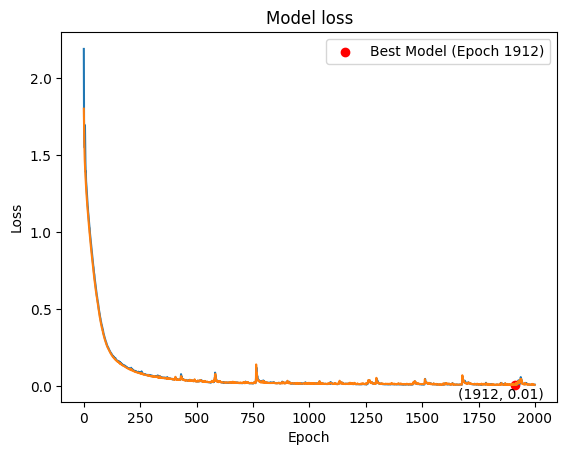

In [26]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Find the epoch with the lowest validation loss
best_epoch = history.history['val_loss'].index(min(history.history['val_loss']))

# Mark the point of the best model on the graph
best_val_loss = history.history['val_loss'][best_epoch]
plt.scatter(best_epoch, best_val_loss, color='red', marker='o', label=f'Best Model (Epoch {best_epoch+1})')
plt.annotate(f'({best_epoch+1}, {best_val_loss:.2f})', (best_epoch, best_val_loss), textcoords="offset points", xytext=(-10,-10), ha='center')

plt.legend()

plt.show()

In [156]:
severity_44_file = "predictions2.xlsx"
train_results.to_excel(severity_44_file, index=False)